# FAA_Project 2

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression

## Data analysis

### Data description

In [7]:
# Load the datasets
test_data = pd.read_csv("airline_passenger_satistaction_test.csv")
train_data = pd.read_csv("airline_passenger_satistaction_train.csv")

In [13]:
# View first lines - test dataset
print(test_data.head())

   Unnamed: 0     id  Gender      Customer Type  Age   Type of Travel  \
0           0  19556  Female     Loyal Customer   52  Business travel   
1           1  90035  Female     Loyal Customer   36  Business travel   
2           2  12360    Male  disloyal Customer   20  Business travel   
3           3  77959    Male     Loyal Customer   44  Business travel   
4           4  36875  Female     Loyal Customer   49  Business travel   

      Class  Flight Distance  Inflight wifi service  \
0       Eco              160                      5   
1  Business             2863                      1   
2       Eco              192                      2   
3  Business             3377                      0   
4       Eco             1182                      2   

   Departure/Arrival time convenient  ...  Inflight entertainment  \
0                                  4  ...                       5   
1                                  1  ...                       4   
2                      

In [14]:
# View the first few lines - dataset train
print(train_data.head())

   Unnamed: 0      id  Gender      Customer Type  Age   Type of Travel  \
0           0   70172    Male     Loyal Customer   13  Personal Travel   
1           1    5047    Male  disloyal Customer   25  Business travel   
2           2  110028  Female     Loyal Customer   26  Business travel   
3           3   24026  Female     Loyal Customer   25  Business travel   
4           4  119299    Male     Loyal Customer   61  Business travel   

      Class  Flight Distance  Inflight wifi service  \
0  Eco Plus              460                      3   
1  Business              235                      3   
2  Business             1142                      2   
3  Business              562                      2   
4  Business              214                      3   

   Departure/Arrival time convenient  ...  Inflight entertainment  \
0                                  4  ...                       5   
1                                  2  ...                       1   
2                

In [15]:
# Column summary - test dataset
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 non-null  int

In [16]:
# Column summary - dataset train
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [ ]:
# Descriptive statistics - test dataset
print(test_data.describe())

         Unnamed: 0             id           Age  Flight Distance  \
count  25976.000000   25976.000000  25976.000000     25976.000000   
mean   12987.500000   65005.657992     39.620958      1193.788459   
std     7498.769632   37611.526647     15.135685       998.683999   
min        0.000000      17.000000      7.000000        31.000000   
25%     6493.750000   32170.500000     27.000000       414.000000   
50%    12987.500000   65319.500000     40.000000       849.000000   
75%    19481.250000   97584.250000     51.000000      1744.000000   
max    25975.000000  129877.000000     85.000000      4983.000000   

       Inflight wifi service  Departure/Arrival time convenient  \
count           25976.000000                       25976.000000   
mean                2.724746                           3.046812   
std                 1.335384                           1.533371   
min                 0.000000                           0.000000   
25%                 2.000000               

In [18]:
# Descriptive statistics - dataset train
print(train_data.describe())

          Unnamed: 0             id            Age  Flight Distance  \
count  103904.000000  103904.000000  103904.000000    103904.000000   
mean    51951.500000   64924.210502      39.379706      1189.448375   
std     29994.645522   37463.812252      15.114964       997.147281   
min         0.000000       1.000000       7.000000        31.000000   
25%     25975.750000   32533.750000      27.000000       414.000000   
50%     51951.500000   64856.500000      40.000000       843.000000   
75%     77927.250000   97368.250000      51.000000      1743.000000   
max    103903.000000  129880.000000      85.000000      4983.000000   

       Inflight wifi service  Departure/Arrival time convenient  \
count          103904.000000                      103904.000000   
mean                2.729683                           3.060296   
std                 1.327829                           1.525075   
min                 0.000000                           0.000000   
25%                 2.000

In [9]:
# Check for missing values - test dataset
print(test_data.isnull().sum())

Unnamed: 0                            0
id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0


In [10]:
# Check for missing values - dataset train
print(train_data.isnull().sum())

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [11]:
# Frequency of the target variable - test dataset
print(test_data['satisfaction'].value_counts())

satisfaction
neutral or dissatisfied    14573
satisfied                  11403
Name: count, dtype: int64


In [12]:
# Frequency of the target variable - dataset train
print(train_data['satisfaction'].value_counts())

satisfaction
neutral or dissatisfied    58879
satisfied                  45025
Name: count, dtype: int64


### Data visualization

#### Distribution of numerical variables

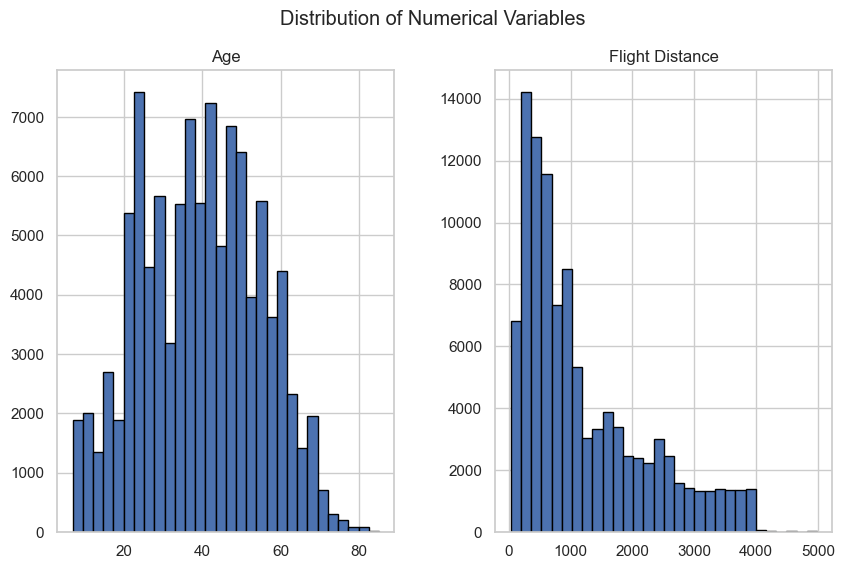

In [79]:
plt.rcParams["figure.figsize"] = (10, 6)

# Create histograms for the variables 'Age' and 'Flight Distance'
train_data[['Age', 'Flight Distance']].hist(bins=30, edgecolor='black')

plt.suptitle("Distribution of Numerical Variables")

plt.show()

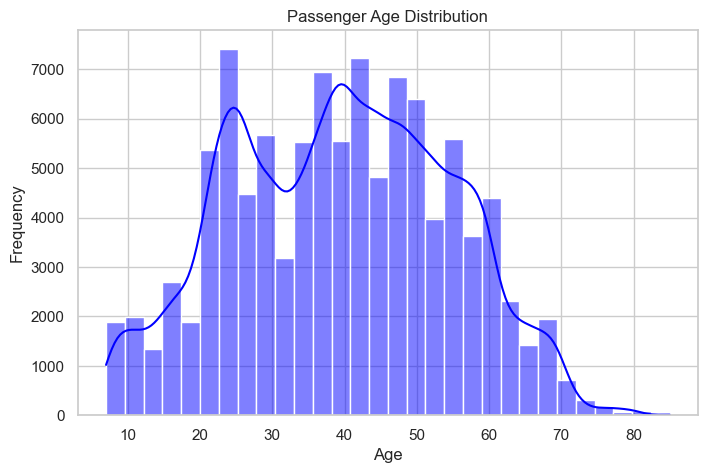

In [80]:
# Age Histogram
plt.figure(figsize=(8, 5))
sns.histplot(train_data['Age'], bins=30, kde=True, color='blue')
plt.title('Passenger Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

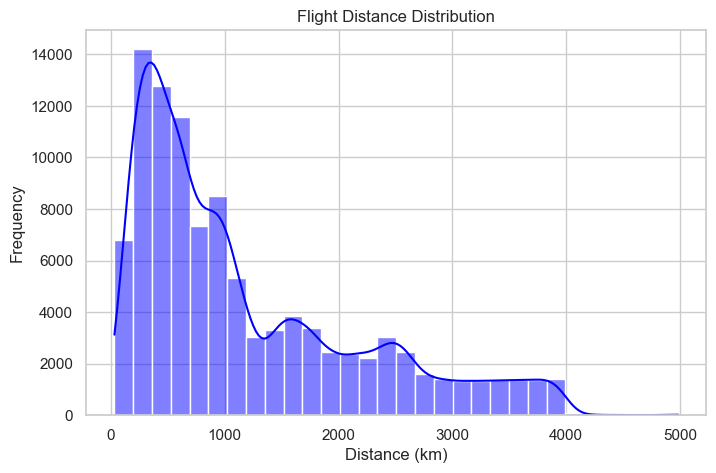

In [81]:
# Flight distance histogram
plt.figure(figsize=(8, 5))
sns.histplot(train_data['Flight Distance'], bins=30, kde=True, color='blue')
plt.title('Flight Distance Distribution')
plt.xlabel('Distance (km)')
plt.ylabel('Frequency')
plt.show()

C:\Users\iness\AppData\Local\Temp\ipykernel_13412\2385009711.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([


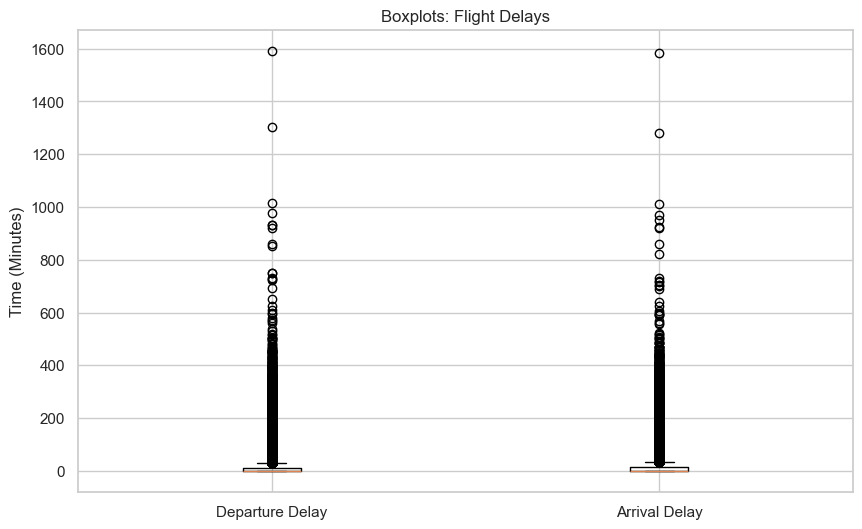

In [82]:
plt.figure(figsize=(10, 6))

# Create the boxplot for the delay variables
plt.boxplot([
    train_data['Departure Delay in Minutes'].dropna(),  
    train_data['Arrival Delay in Minutes'].dropna()   
], labels=['Departure Delay', 'Arrival Delay']) 

plt.title("Boxplots: Flight Delays")
plt.ylabel("Time (Minutes)")

plt.show()

#### Comparison of categorical variables

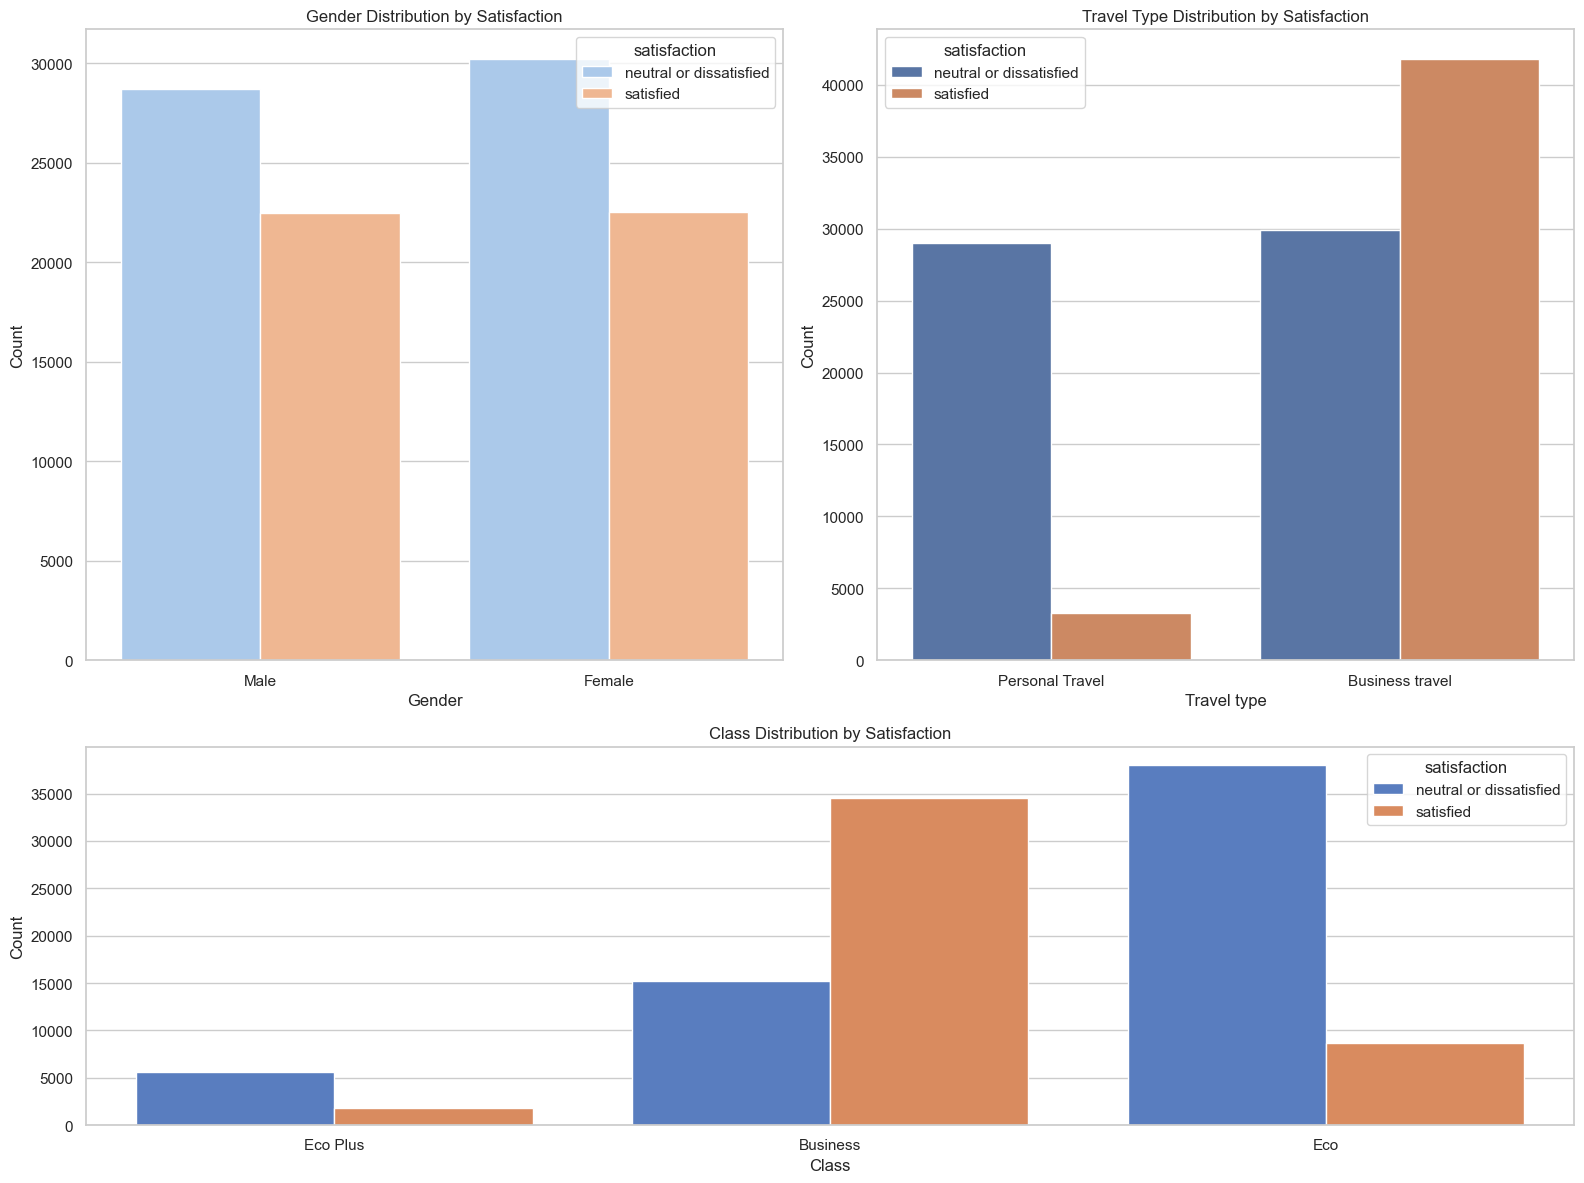

In [85]:
sns.set(style="whitegrid")

# Create the layout with GridSpec
fig = plt.figure(figsize=(16, 12))
gs = gridspec.GridSpec(2, 2, height_ratios=[1, 0.6])  

# Gender Distribution by Satisfaction
ax1 = fig.add_subplot(gs[0, 0])  
sns.countplot(data=train_data, x='Gender', hue='satisfaction', palette='pastel', ax=ax1)
ax1.set_title("Gender Distribution by Satisfaction")
ax1.set_xlabel("Gender")
ax1.set_ylabel("Count")

# Travel Type Distribution by Satisfaction
ax2 = fig.add_subplot(gs[0, 1])  
sns.countplot(data=train_data, x='Type of Travel', hue='satisfaction', palette='deep', ax=ax2)
ax2.set_title("Travel Type Distribution by Satisfaction")
ax2.set_xlabel("Travel type")
ax2.set_ylabel("Count")

# Class Distribution by Satisfaction
ax3 = fig.add_subplot(gs[1, :])  
sns.countplot(data=train_data, x='Class', hue='satisfaction', palette='muted', ax=ax3)
ax3.set_title("Class Distribution by Satisfaction")
ax3.set_xlabel("Class")
ax3.set_ylabel("Count")

# Ajustar o layout
plt.tight_layout()
plt.show()

#### Correlation between variables

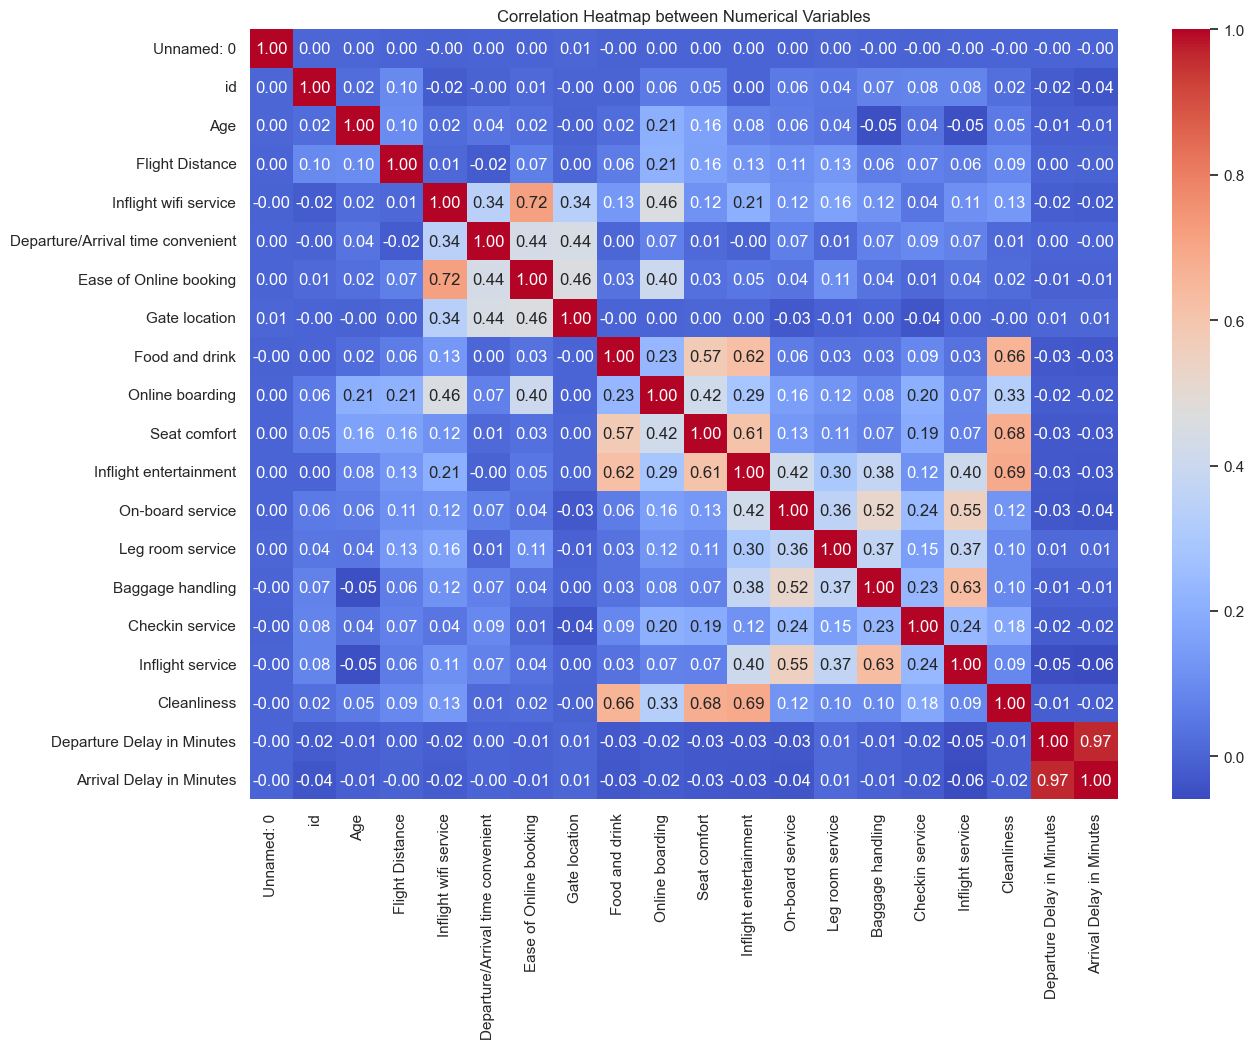

In [86]:
# Select only numerical variables for correlation analysis
numeric_columns = train_data.select_dtypes(include=[float, int])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Create the correlation heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap between Numerical Variables")
plt.show()

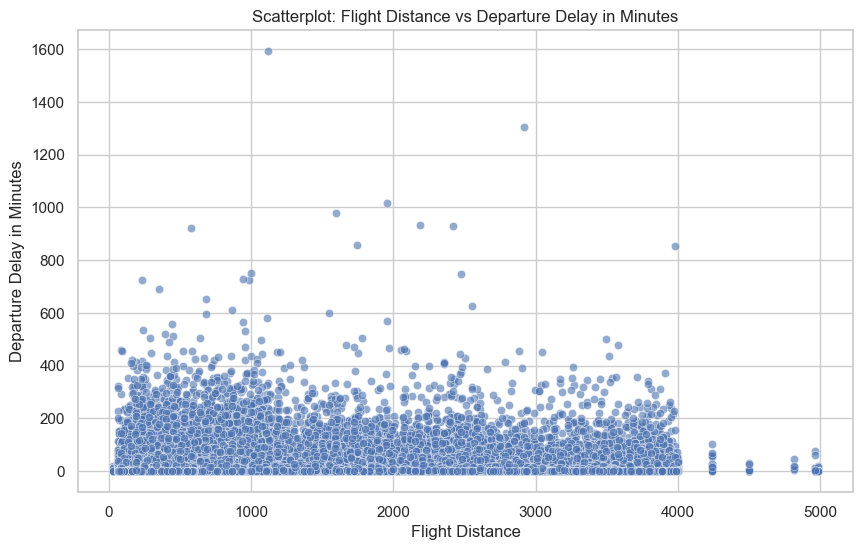

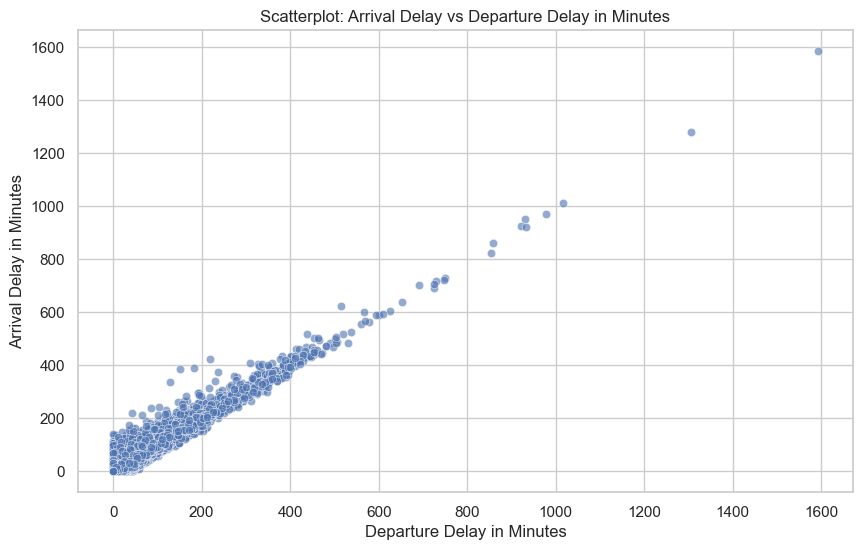

In [87]:
# Scatterplot: Flight Distance vs Departure Delay in Minutes
plt.figure(figsize=(10, 6))
sns.scatterplot(data=train_data, x="Flight Distance", y="Departure Delay in Minutes", alpha=0.6)
plt.title("Scatterplot: Flight Distance vs Departure Delay in Minutes")
plt.xlabel("Flight Distance")
plt.ylabel("Departure Delay in Minutes")
plt.show()

# Scatterplot: Arrival Delay in Minutes vs Departure Delay in Minutes
plt.figure(figsize=(10, 6))
sns.scatterplot(data=train_data, x="Departure Delay in Minutes", y="Arrival Delay in Minutes", alpha=0.6)
plt.title("Scatterplot: Arrival Delay vs Departure Delay in Minutes")
plt.xlabel("Departure Delay in Minutes")
plt.ylabel("Arrival Delay in Minutes")
plt.show()


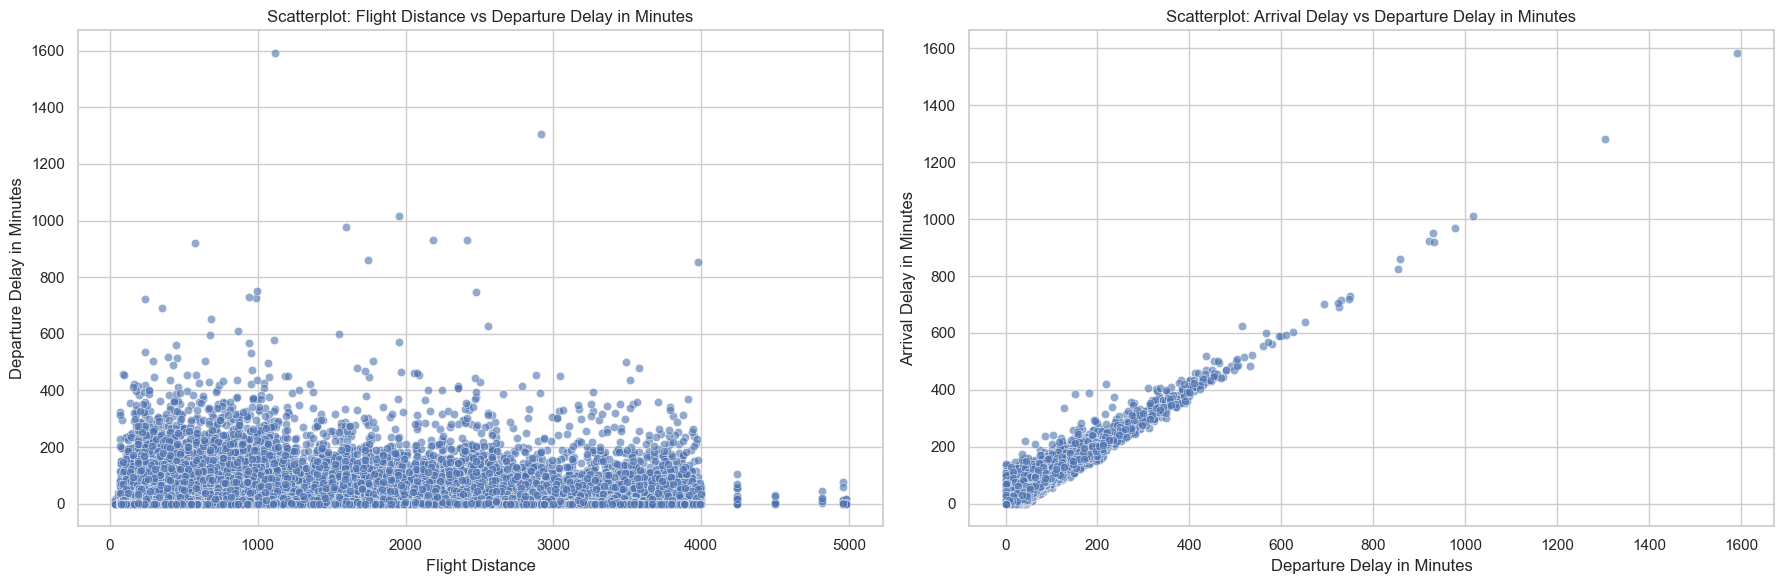

In [88]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Scatterplot: Flight Distance vs Departure Delay in Minutes
sns.scatterplot(data=train_data, x="Flight Distance", y="Departure Delay in Minutes", ax=axes[0], alpha=0.6)
axes[0].set_title("Scatterplot: Flight Distance vs Departure Delay in Minutes")
axes[0].set_xlabel("Flight Distance")
axes[0].set_ylabel("Departure Delay in Minutes")

# Scatterplot: Arrival Delay in Minutes vs Departure Delay in Minutes
sns.scatterplot(data=train_data, x="Departure Delay in Minutes", y="Arrival Delay in Minutes", ax=axes[1], alpha=0.6)
axes[1].set_title("Scatterplot: Arrival Delay vs Departure Delay in Minutes")
axes[1].set_xlabel("Departure Delay in Minutes")
axes[1].set_ylabel("Arrival Delay in Minutes")

plt.tight_layout()
plt.show()

#### Analyze service evaluations

C:\Users\iness\AppData\Local\Temp\ipykernel_13412\1778062139.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_data, x='satisfaction', y=column, palette='pastel')
C:\Users\iness\AppData\Local\Temp\ipykernel_13412\1778062139.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_data, x='satisfaction', y=column, palette='pastel')
C:\Users\iness\AppData\Local\Temp\ipykernel_13412\1778062139.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_data, x='satisfaction', y=column, palette='pastel')
C:\Users\iness\A

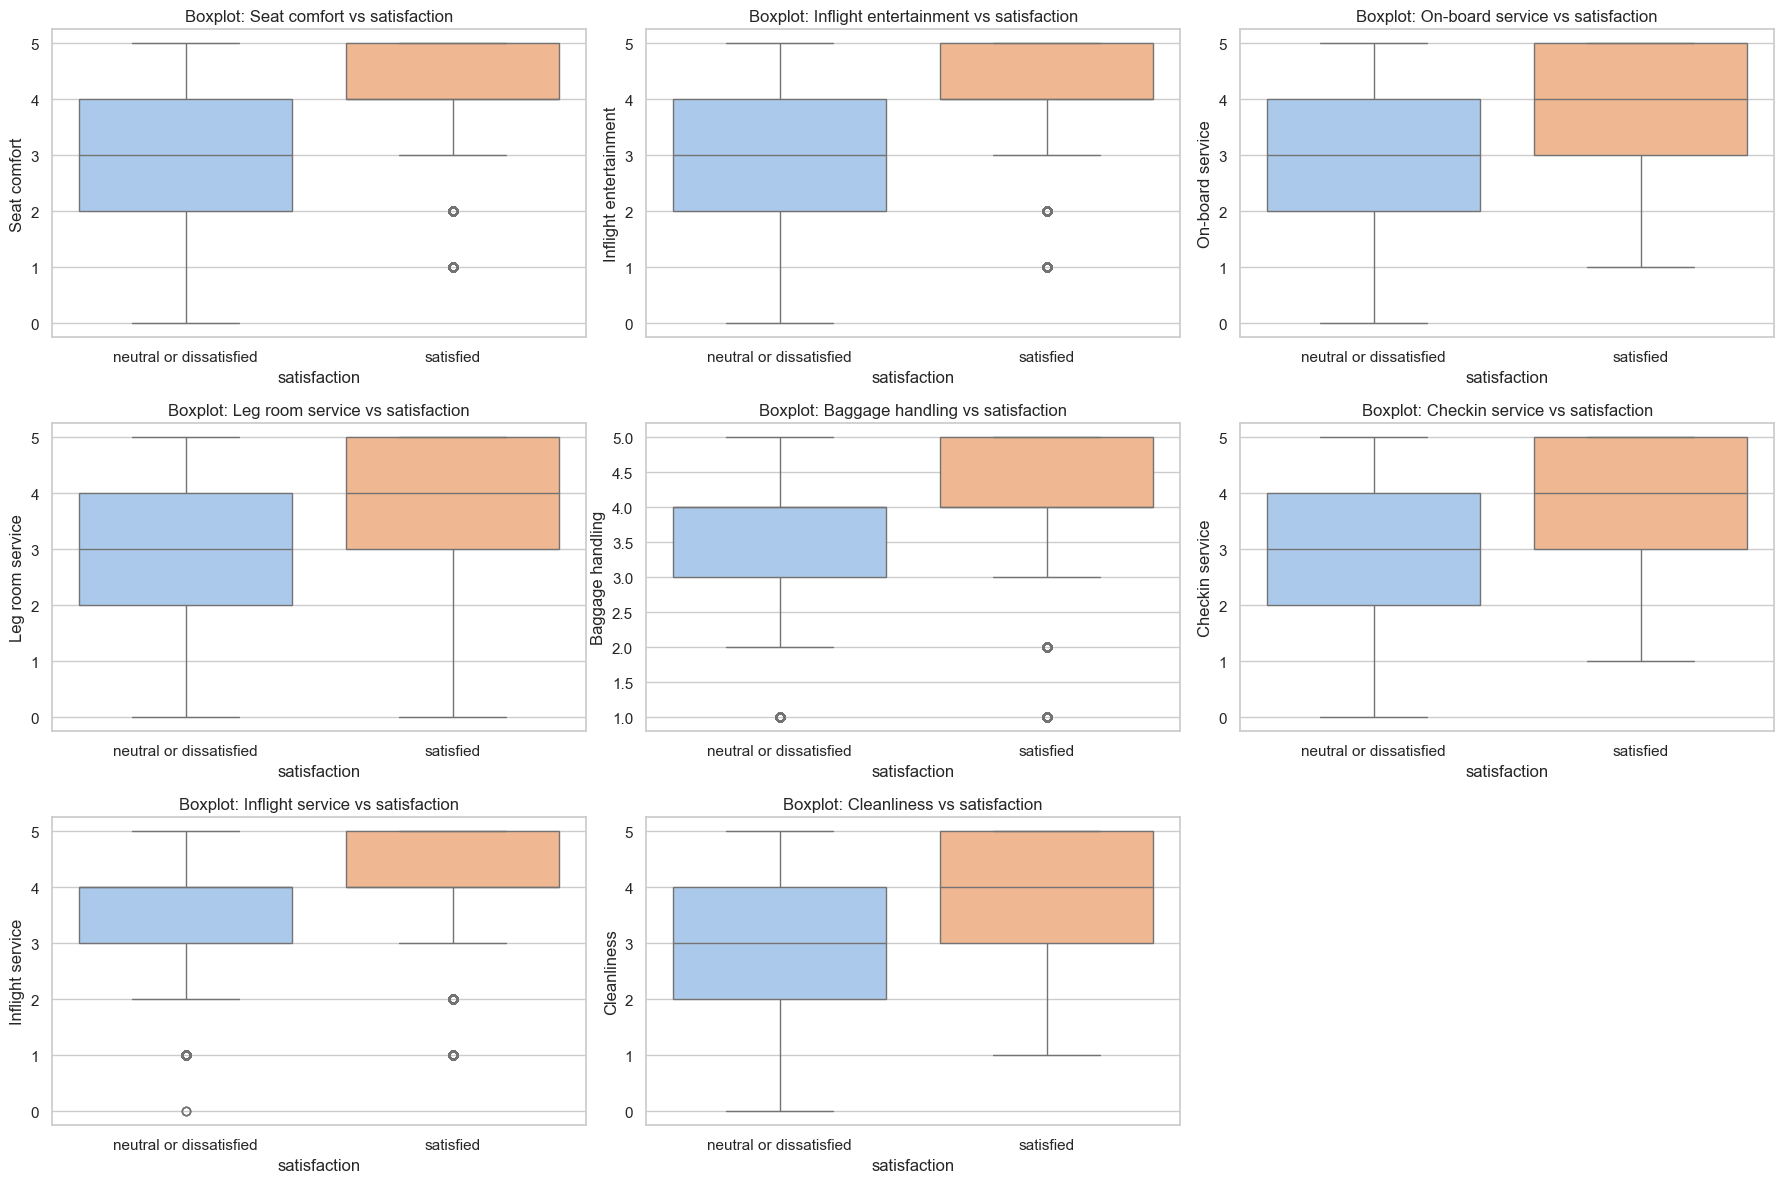

In [89]:
# Service evaluation variables
service_columns = ['Seat comfort', 'Inflight entertainment', 'On-board service', 
                   'Leg room service', 'Baggage handling', 'Checkin service', 
                   'Inflight service', 'Cleanliness']

plt.figure(figsize=(18, 12))

for i, column in enumerate(service_columns, 1):
    plt.subplot(3, 3, i)  
    sns.boxplot(data=train_data, x='satisfaction', y=column, palette='pastel')
    plt.title(f"Boxplot: {column} vs satisfaction")
    plt.xlabel('satisfaction')
    plt.ylabel(f'{column}')
    
plt.tight_layout()
plt.show()

In [90]:
# Calculate the average ratings for each group
mean_ratings = train_data.groupby('satisfaction')[service_columns].mean()

print("Average Satisfaction Ratings:")
print(mean_ratings)

Average Satisfaction Ratings:
                         Seat comfort  Inflight entertainment  \
satisfaction                                                    
neutral or dissatisfied      3.036295                2.894156   
satisfied                    3.966530                3.964931   

                         On-board service  Leg room service  Baggage handling  \
satisfaction                                                                    
neutral or dissatisfied          3.019158          2.990812          3.375991   
satisfied                        3.857324          3.822143          3.966396   

                         Checkin service  Inflight service  Cleanliness  
satisfaction                                                             
neutral or dissatisfied         3.042952          3.388814     2.936123  
satisfied                       3.646041          3.969461     3.744342  


### Data preprocessing

#### Data cleaning

In [8]:
# Check missing values
missing_data = train_data.isnull().sum()
missing_percentage = (missing_data / len(train_data)) * 100

# Create dataframe
missing_info = pd.DataFrame({'Missing Values': missing_data, 'Percentage': missing_percentage})

print(missing_info)


                                   Missing Values  Percentage
Unnamed: 0                                      0    0.000000
id                                              0    0.000000
Gender                                          0    0.000000
Customer Type                                   0    0.000000
Age                                             0    0.000000
Type of Travel                                  0    0.000000
Class                                           0    0.000000
Flight Distance                                 0    0.000000
Inflight wifi service                           0    0.000000
Departure/Arrival time convenient               0    0.000000
Ease of Online booking                          0    0.000000
Gate location                                   0    0.000000
Food and drink                                  0    0.000000
Online boarding                                 0    0.000000
Seat comfort                                    0    0.000000
Inflight

In [9]:
# Imputation with the median 
train_data['Arrival Delay in Minutes'] = train_data['Arrival Delay in Minutes'].fillna(train_data['Arrival Delay in Minutes'].median())

In [10]:
# Select all numeric variables
numeric_columns = train_data.select_dtypes(include=[np.number])

# Function to impute outliers with the median
def impute_outliers_with_median(df, column_name):
    # Calculate the IQR
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    
    # Set limits for outliers
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    
    # Replace outliers with the median
    df[column_name] = np.where(
        (df[column_name] < lower_limit) | (df[column_name] > upper_limit),
        df[column_name].median(),
        df[column_name]
    )

# Apply imputation to all numeric variables
for column in numeric_columns.columns:
    impute_outliers_with_median(train_data, column)

print(train_data.describe())

          Unnamed: 0             id            Age  Flight Distance  \
count  103904.000000  103904.000000  103904.000000    103904.000000   
mean    51951.500000   64924.210502      39.379706      1122.334568   
std     29994.645522   37463.812252      15.114964       911.867686   
min         0.000000       1.000000       7.000000        31.000000   
25%     25975.750000   32533.750000      27.000000       414.000000   
50%     51951.500000   64856.500000      40.000000       843.000000   
75%     77927.250000   97368.250000      51.000000      1620.000000   
max    103903.000000  129880.000000      85.000000      3736.000000   

       Inflight wifi service  Departure/Arrival time convenient  \
count          103904.000000                      103904.000000   
mean                2.729683                           3.060296   
std                 1.327829                           1.525075   
min                 0.000000                           0.000000   
25%                 2.000

#### Data Type Conversion

In [11]:
# Check current data types in dataset
data_types = train_data.dtypes

# Identify categorical and numerical variables
categorical_columns = train_data.select_dtypes(include=['object']).columns
numerical_columns = train_data.select_dtypes(include=[np.number]).columns

# Display data types for review
print("Current Data Types:\n", data_types)

Current Data Types:
 Unnamed: 0                           float64
id                                   float64
Gender                                object
Customer Type                         object
Age                                  float64
Type of Travel                        object
Class                                 object
Flight Distance                      float64
Inflight wifi service                float64
Departure/Arrival time convenient    float64
Ease of Online booking               float64
Gate location                        float64
Food and drink                       float64
Online boarding                      float64
Seat comfort                         float64
Inflight entertainment               float64
On-board service                     float64
Leg room service                     float64
Baggage handling                     float64
Checkin service                      float64
Inflight service                     float64
Cleanliness                       

In [12]:
# Conversion of categorical variables (One-Hot Encoding for nominal variables)
train_data_encoded = pd.get_dummies(train_data, columns=categorical_columns, drop_first=True)

# Check first data after conversion
print("\nData after One-Hot Encoding:\n", train_data_encoded.head())


Data after One-Hot Encoding:
    Unnamed: 0        id   Age  Flight Distance  Inflight wifi service  \
0         0.0   70172.0  13.0            460.0                    3.0   
1         1.0    5047.0  25.0            235.0                    3.0   
2         2.0  110028.0  26.0           1142.0                    2.0   
3         3.0   24026.0  25.0            562.0                    2.0   
4         4.0  119299.0  61.0            214.0                    3.0   

   Departure/Arrival time convenient  Ease of Online booking  Gate location  \
0                                4.0                     3.0            1.0   
1                                2.0                     3.0            3.0   
2                                2.0                     2.0            2.0   
3                                5.0                     5.0            5.0   
4                                3.0                     3.0            3.0   

   Food and drink  Online boarding  ...  Inflight servi

In [13]:
# Check if numeric variables have the correct type
numerical_data_types = train_data_encoded[numerical_columns].dtypes

# Display Numeric Variable Types After One-Hot Encoding
print("\nData Types of Numeric Variables:", numerical_data_types)


Data Types of Numeric Variables: Unnamed: 0                           float64
id                                   float64
Age                                  float64
Flight Distance                      float64
Inflight wifi service                float64
Departure/Arrival time convenient    float64
Ease of Online booking               float64
Gate location                        float64
Food and drink                       float64
Online boarding                      float64
Seat comfort                         float64
Inflight entertainment               float64
On-board service                     float64
Leg room service                     float64
Baggage handling                     float64
Checkin service                      float64
Inflight service                     float64
Cleanliness                          float64
Departure Delay in Minutes           float64
Arrival Delay in Minutes             float64
dtype: object


#### Normalization

In [14]:
# Create the MinMaxScaler object
scaler = MinMaxScaler()

# Select numeric variables for normalization
numerical_columns = train_data_encoded.select_dtypes(include=[np.number]).columns

# Normalize the data
train_data_normalized = train_data_encoded.copy()  
train_data_normalized[numerical_columns] = scaler.fit_transform(train_data_encoded[numerical_columns])

print("\nData after Normalization:\n", train_data_normalized.head())


Data after Normalization:
    Unnamed: 0        id       Age  Flight Distance  Inflight wifi service  \
0    0.000000  0.540280  0.076923         0.115789                    0.6   
1    0.000010  0.038852  0.230769         0.055061                    0.6   
2    0.000019  0.847150  0.243590         0.299865                    0.4   
3    0.000029  0.184980  0.230769         0.143320                    0.4   
4    0.000038  0.918532  0.692308         0.049393                    0.6   

   Departure/Arrival time convenient  Ease of Online booking  Gate location  \
0                                0.8                     0.6            0.2   
1                                0.4                     0.6            0.6   
2                                0.4                     0.4            0.4   
3                                1.0                     1.0            1.0   
4                                0.6                     0.6            0.6   

   Food and drink  Online boarding

#### Division of data

In [15]:
# Split the data into X (features) and y (target)
X = train_data_normalized.drop(columns=['satisfaction_satisfied']) # Features (all columns except 'satisfaction')
y = train_data_normalized['satisfaction_satisfied']  # Target 

# Split the data into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the division
print(f"Training data: {X_train.shape[0]} lines")
print(f"Test Data: {X_test.shape[0]} lines")


Training data: 83123 lines
Test Data: 20781 lines


                            Feature  Importance
9                   Online boarding    0.185827
4             Inflight wifi service    0.139076
22   Type of Travel_Personal Travel    0.107010
23                        Class_Eco    0.070417
11           Inflight entertainment    0.059587
10                     Seat comfort    0.048036
13                 Leg room service    0.040463
21  Customer Type_disloyal Customer    0.038765
6            Ease of Online booking    0.037364
12                 On-board service    0.031914


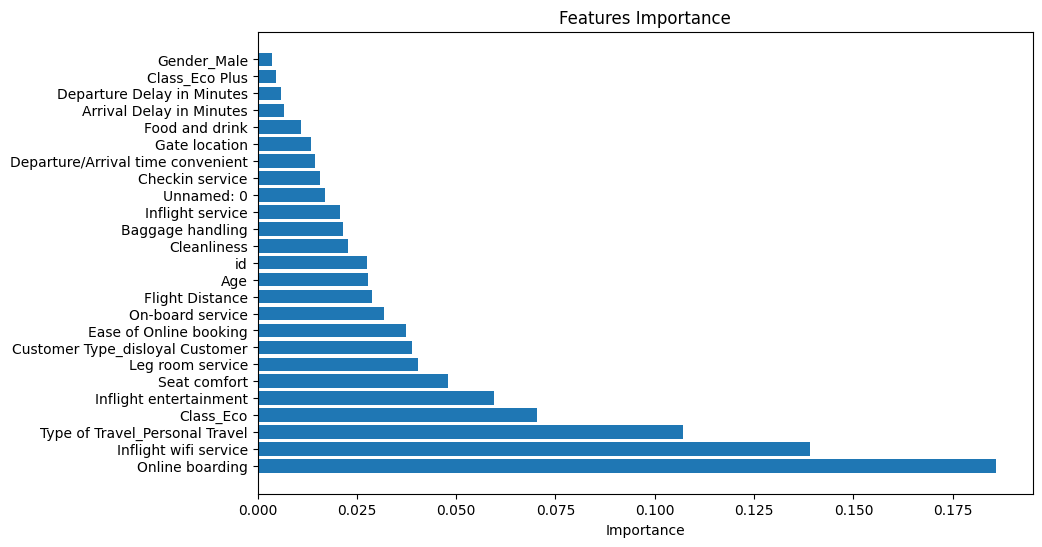

In [16]:
# Train a Random Forest model to check the importance of features
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Get the importance of variables
feature_importances = model.feature_importances_

# Create a DataFrame to store feature importance
features = X_train.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the 10 most important variables
print(importance_df.head(10))

# Plot the importance of variables
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Features Importance')
plt.show()


#### Feature selection

In [17]:
# Remove irrelevant columns 'Unnamed:0' and 'id'
train_data_cleaned = train_data_normalized.drop(columns=['Unnamed: 0', 'id'])

# Check first rows after removing columns
print(train_data_cleaned.head())

        Age  Flight Distance  Inflight wifi service  \
0  0.076923         0.115789                    0.6   
1  0.230769         0.055061                    0.6   
2  0.243590         0.299865                    0.4   
3  0.230769         0.143320                    0.4   
4  0.692308         0.049393                    0.6   

   Departure/Arrival time convenient  Ease of Online booking  Gate location  \
0                                0.8                     0.6            0.2   
1                                0.4                     0.6            0.6   
2                                0.4                     0.4            0.4   
3                                1.0                     1.0            1.0   
4                                0.6                     0.6            0.6   

   Food and drink  Online boarding  Seat comfort  Inflight entertainment  ...  \
0             1.0              0.6           1.0                     1.0  ...   
1             0.2              0

## Machine Learning Models

### Random Forest

In [18]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Train the model with the training set
rf_model.fit(X_train, y_train)

# Making predictions with the test set
rf_pred = rf_model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, rf_pred)
print(f"Random Forest - Accuracy: {accuracy:.4f}")
print("\nClassification Report - Random Forest:\n", classification_report(y_test, rf_pred))

Random Forest - Accuracy: 0.9637

Classification Report - Random Forest:
               precision    recall  f1-score   support

       False       0.96      0.98      0.97     11713
        True       0.97      0.94      0.96      9068

    accuracy                           0.96     20781
   macro avg       0.97      0.96      0.96     20781
weighted avg       0.96      0.96      0.96     20781



In [19]:
# Define the parameters we want to test
param_dist = {
    'n_estimators': [100, 200, 300, 500, 1000],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

In [20]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

In [21]:
# RandomizedSearchCV for parameter searching with cross-validation
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist, 
                                   n_iter=100, cv=5, verbose=2, n_jobs=-1, scoring='accuracy', random_state=42)

In [ ]:
# Adjust the model
random_search.fit(X_train, y_train)

# Best parameter combination
print("Melhor combinação de hiperparâmetros:", random_search.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


KeyboardInterrupt: 

### Logistic Regression

In [25]:
# Inicializar o modelo de Regressão Logística
logreg_model = LogisticRegression(random_state=42, max_iter=1000)

# Treinar o modelo com o conjunto de treino
logreg_model.fit(X_train, y_train)

# Fazer previsões com o conjunto de teste
logreg_pred = logreg_model.predict(X_test)

# Avaliar o desempenho do modelo
accuracy = accuracy_score(y_test, logreg_pred)
print(f"Logistic Regression - Acurácia: {accuracy:.4f}")

# Relatório de Classificação
print("\nRelatório de Classificação - Logistic Regression:\n", classification_report(y_test, logreg_pred))

Logistic Regression - Acurácia: 0.8758

Relatório de Classificação - Logistic Regression:
               precision    recall  f1-score   support

       False       0.88      0.90      0.89     11713
        True       0.87      0.84      0.86      9068

    accuracy                           0.88     20781
   macro avg       0.88      0.87      0.87     20781
weighted avg       0.88      0.88      0.88     20781



In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Definir os valores de C que queremos testar
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}

# Inicializar o modelo de Regressão Logística
logreg_model = LogisticRegression(random_state=42, max_iter=1000)

# GridSearchCV para buscar o melhor valor de C
grid_search = GridSearchCV(estimator=logreg_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Ajustar o modelo
grid_search.fit(X_train, y_train)

# Melhor valor de C encontrado
print("Melhor valor de C:", grid_search.best_params_)

# Avaliar o modelo ajustado
logreg_best_model = grid_search.best_estimator_
logreg_best_pred = logreg_best_model.predict(X_test)

# Avaliar a performance do modelo ajustado
accuracy = accuracy_score(y_test, logreg_best_pred)
print(f"\nLogistic Regression Ajustado - Acurácia: {accuracy:.4f}")
print("\nRelatório de Classificação - Logistic Regression Ajustado:\n", classification_report(y_test, logreg_best_pred))

Melhor valor de C: {'C': 0.1}

Logistic Regression Ajustado - Acurácia: 0.8758

Relatório de Classificação - Logistic Regression Ajustado:
               precision    recall  f1-score   support

       False       0.88      0.90      0.89     11713
        True       0.87      0.84      0.86      9068

    accuracy                           0.88     20781
   macro avg       0.88      0.87      0.87     20781
weighted avg       0.88      0.88      0.88     20781



In [27]:
# Previsões de probabilidades
logreg_probs = logreg_best_model.predict_proba(X_test)[:, 1]

# Ajustar o threshold para 0.3 (por exemplo)
threshold = 0.3
logreg_pred_adjusted = (logreg_probs >= threshold).astype(int)

# Avaliar a performance com o novo threshold
accuracy = accuracy_score(y_test, logreg_pred_adjusted)
print(f"\nLogistic Regression com Threshold Ajustado - Acurácia: {accuracy:.4f}")
print("\nRelatório de Classificação com Threshold Ajustado - Logistic Regression:\n", classification_report(y_test, logreg_pred_adjusted))



Logistic Regression com Threshold Ajustado - Acurácia: 0.8404

Relatório de Classificação com Threshold Ajustado - Logistic Regression:
               precision    recall  f1-score   support

       False       0.91      0.80      0.85     11713
        True       0.77      0.90      0.83      9068

    accuracy                           0.84     20781
   macro avg       0.84      0.85      0.84     20781
weighted avg       0.85      0.84      0.84     20781

